In [ ]:
import os
from os.path import join
import re
import pickle

from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

from vowpalwabbit.DFtoVW import DFtoVW
from vowpalwabbit.pyvw import vw

# Graphical
SUPTITLE_FONTSIZE = 20
SUPTITLE_FONTWEIGHT = "bold"
TITLE_FONTSIZE = 15

from utils import default_feature_str, default_feature_str, get_test_example, get_vw_examples, get_training_example

In [ ]:
feature_names =["Num token","Num char","Avg word length","Num ADJ","Num ADP","Num ADV","Num AUX","Num CCONJ","Num DET","Num INTJ","Num NOUN","Num NUM","Num PART","Num PRON","Num PROPN","Num PUNCT","Num SCONJ","Num SYM","Num VERB","Num X","Num LOC","Num MISC","Num ORG","Num PER","Num Abbr=Yes","Num Case=Acc","Num Case=Nom","Num Definite=Def","Num Definite=Ind","Num Degree=Cmp","Num Degree=Pos","Num Degree=Sup","Num Foreign=Yes","Num Gender=Fem","Num Gender=Masc","Num Gender=Neut","Num Mood=Imp","Num Mood=Ind","Num NumForm=Digit","Num NumForm=Word","Num NumType=Card","Num NumType=Mult","Num NumType=Ord","Num Number=Plur","Num Number=Sing","Num Person=1","Num Person=2","Num Person=3","Num Polarity=Neg","Num Poss=Yes","Num PronType=Art","Num PronType=Dem","Num PronType=Int","Num PronType=Prs","Num PronType=Rel","Num Reflex=Yes","Num Tense=Past","Num Tense=Pres","Num VerbForm=Fin","Num VerbForm=Ger","Num VerbForm=Inf","Num VerbForm=Part","Num Voice=Pass","Num Style=Expr","Num NumForm=Roman","Num Mood=Cnd","Num Mood=Sub","Num Number[psor]=Plur","Num Number[psor]=Sing","Num Person[psor]=1","Num Person[psor]=2","Num Person[psor]=3","Num PronType=Exc","Num PronType=Ind","Num PronType=Neg","Num Tense=Fut","Num Tense=Imp","Num Typo=Yes","Num Case=Dat","Num Case=Gen","Num Gender[psor]=Masc,Neut","Num Animacy=Anim","Num Animacy=Inan","Num Aspect=Imp","Num Aspect=Perf","Num Case=Ins","Num Case=Loc","Num Variant=Short","Num VerbForm=Conv","Num Voice=Act","Num Voice=Mid","Num AdpType=Comprep","Num AdpType=Prep","Num AdpType=Voc","Num Case=Voc","Num ConjType=Oper","Num Gender=Fem,Masc","Num Gender=Fem,Neut","Num Gender=Masc,Neut","Num Gender[psor]=Fem","Num Gender[psor]=Masc","Num Hyph=Yes","Num NameType=Com","Num NameType=Geo","Num NameType=Giv","Num NameType=Nat","Num NameType=Sur","Num NumType=Frac","Num NumType=Sets","Num NumValue=1","Num NumValue=1,2,3","Num Number=Dual","Num Number=Plur,Sing","Num Polarity=Pos","Num PrepCase=Npr","Num PrepCase=Pre","Num PronType=Emp","Num PronType=Int,Rel","Num PronType=Tot","Num Style=Arch","Num Style=Coll",
        ]
        
X_train = np.load("./data/X_train.npy")
y_train = np.load("./data/y_train.npy")
X_test = np.load("./data/X_test.npy")
y_test = np.load("./data/y_test.npy")

(79020, 122)


In [40]:
from flaml import AutoML

# Initialize an AutoML instance
automl = AutoML()
# Specify automl goal and constraint
automl_settings = {
    "time_budget": 60,  # in seconds
    "metric": 'r2',
    "task": 'regression',
    "log_file_name": "my.log",
}
# Train with labeled input data
automl.fit(X_train=X_train, y_train=y_train,
           **automl_settings)

[flaml.automl: 01-24 01:55:20] {2007} INFO - task = regression
[flaml.automl: 01-24 01:55:20] {2009} INFO - Data split method: uniform
[flaml.automl: 01-24 01:55:20] {2013} INFO - Evaluation method: holdout
[flaml.automl: 01-24 01:55:20] {2113} INFO - Minimizing error metric: 1-r2
[flaml.automl: 01-24 01:55:20] {2170} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'catboost', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl: 01-24 01:55:20] {2437} INFO - iteration 0, current learner lgbm
[flaml.automl: 01-24 01:55:20] {2550} INFO - Estimated sufficient time budget=1420s. Estimated necessary time budget=12s.
[flaml.automl: 01-24 01:55:20] {2597} INFO -  at 0.1s,	estimator lgbm's best error=0.9924,	best estimator lgbm's best error=0.9924
[flaml.automl: 01-24 01:55:20] {2437} INFO - iteration 1, current learner lgbm
[flaml.automl: 01-24 01:55:20] {2597} INFO -  at 0.1s,	estimator lgbm's best error=0.9924,	best estimator lgbm's best error=0.9924
[flaml.automl: 01-24 01:55

In [24]:
y_pred = automl.predict(X_test)

In [25]:
from sklearn.metrics import  r2_score, mean_absolute_error , mean_squared_error
print(f"R2  : {r2_score(y_test, y_pred)}")
print(f"MAE : {mean_absolute_error(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")

R2  : 0.18148587857937692
MAE : 0.43112686705864595
MSE: 0.4776119625929101


/home/krishna/miniconda3/envs/interactive-learning/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/home/krishna/miniconda3/envs/interactive-learning/lib/python3.8/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/home/krishna/miniconda3/envs/interactive-learning/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level fu

Text(0.5, 1.0, 'Normal Regression')

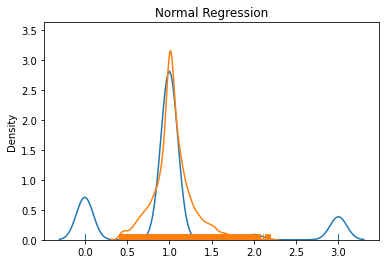

In [37]:
sns.distplot(y_test, hist=False, rug=True)
sns.distplot(y_pred, hist=False, rug=True)
plt.title("Normal Regression")